In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('face.jpg')

In [4]:
print(img)

[[[22 30 47]
  [20 30 47]
  [20 30 47]
  ...
  [ 3  5  6]
  [ 2  4  5]
  [ 2  4  5]]

 [[22 32 49]
  [22 32 49]
  [22 32 49]
  ...
  [ 3  5  6]
  [ 2  4  5]
  [ 2  4  5]]

 [[24 34 51]
  [24 34 51]
  [25 35 52]
  ...
  [ 3  5  6]
  [ 3  5  6]
  [ 2  4  5]]

 ...

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]]


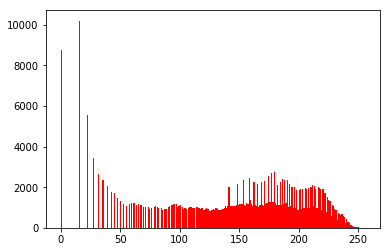

In [3]:
# histogram
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img, table)
img_brighter = adjust_gamma(img, 2)

img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
if key == 27:
    exit()